<a href="https://colab.research.google.com/github/ChengYao0209/Kaggle_SpaceTItanic/blob/main/SpaceTitanic_0814.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

此次目標重點

## **predict whether a passenger was transported to an alternate dimension** during the Spaceship Titanic's collision with the spacetime anomaly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!unzip -uq /content/drive/MyDrive/DataScience/Kaggle/SpaceTitanic/spaceship-titanic.zip -d /content/

In [ ]:
df_train=pd.read_csv("train.csv")
df_train.head(10)

In [ ]:
df_test=pd.read_csv("test.csv")
df_test.head(10)

先從原網址中擷取各個feature的資訊

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.每位乘客的id，理論上與此無關

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.每位乘客從哪裡來

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. 是否進入冷凍睡眠

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. 座位

Destination - The planet the passenger will be debarking to. 

Age - The age of the passenger. 年紀

VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger. 名字，這邊我想先當不影響

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. 解答

先檢查各項資訊，如各種資料型態與缺失值

In [6]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

先處理缺失值得部分，我想知道每項feature本身的缺失值總共佔了整體的多少比例

In [8]:
df_train.shape

(8693, 14)

In [9]:
def devide(x):
  return (x/8693)*100

df_train.isna().sum().apply(devide)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

除了最一開始的ID和最後的解答以外，大約都有2~3%的缺失值

雖然說這個數量可能可以直接drop掉，但我個人並不喜歡把資料去除，所以我想用填充眾樹的方式取代

不過其中名字的部分有缺失就沒辦法了，而名字也沒有像是Mr,Mrs之類可以用的東西

不過我認為名字應該和這個沒有關係，所以先不理他


In [ ]:
cols=df_train.isna().sum().index[1:12]
for i in cols:
    print(i)
    df_train[i].fillna(df_train[i].mode()[0],inplace=True)





In [11]:
df_train.isna().sum().apply(devide)

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.300702
Transported     0.000000
dtype: float64

搞定，先把資料拉出來

接下來先用視覺化看一下feature之間的關係


In [12]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


視覺化 (1) heatmap

對於數值的部分個人習慣一開始先用熱力圖看一下大概情況

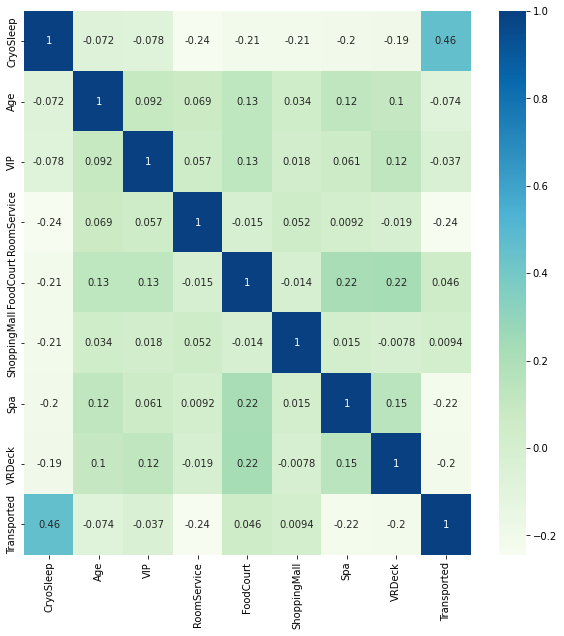

In [15]:
corr=df_train.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="GnBu")

接下來處理一下其他變數的部分
我想知道以下 : 

1.有冷凍睡眠的乘客是否能因此能撐到目的地?

2.不同星球(Destination)的關係,是否會有能否撐到目的地的問題(有些太遠可能撐不到)

3.Cabin在生存上我認為有可能,因為關於碰撞時的位子
如果再撞擊處的地方可能當場死亡，但遠離的話對於乘客的身體可能比較沒有影響

4.age

5.對於VIP的部分(Spa,roomservice的部分我先保留意見，個人認為不太有影響，那純粹是乘客在船上的消費行為)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


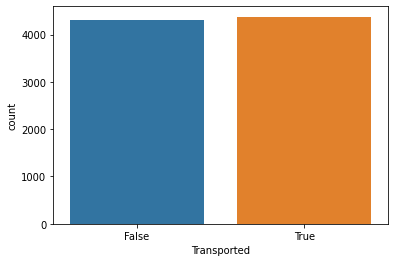

In [30]:
sns.countplot(df_train["Transported"])

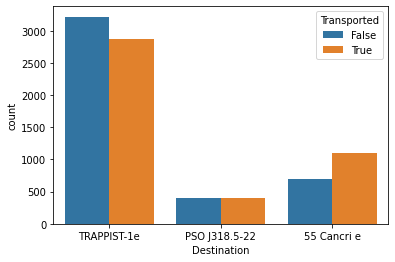

In [32]:
sns.countplot(data=df_train,x="Destination",hue="Transported")

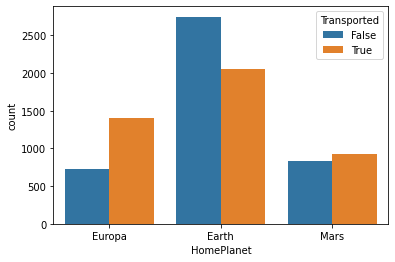

In [39]:
sns.countplot(data=df_train,x="HomePlanet",hue="Transported")

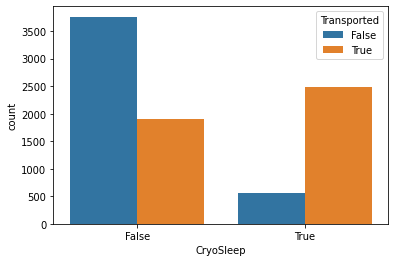

In [33]:
sns.countplot(data=df_train,x="CryoSleep",hue="Transported")

接著我想看一下艙位

從說明中可以知道cain本身大概長這樣 deck/num/side
從說明說我好奇

1.不同艙位差在哪?

2.哪一側(side)差在哪?

這邊先對於cabin這串資料把需要的資料取出來:)

In [34]:
def Cabin(list1):
  #list1 : 得到deck
  #list1 : 得到side
  deck=[]
  side=[]
  for i in range(len(list1)):
    deck.append(list1[i].split("/")[0]) #把每個人做的艙位拉出來
    side.append(list1[i].split("/")[-1]) #每一側拉出來
  
  return deck,side #回傳所需資料

deck,side=Cabin(df_train["Cabin"])
df_train["Cabin_deck"]=deck
df_train["Cabin_side"]=side

df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


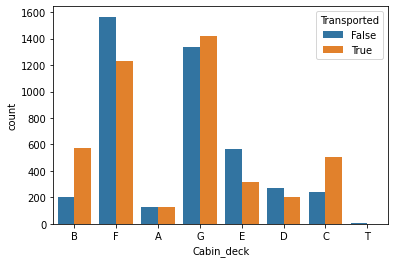

In [38]:
sns.countplot(data=df_train,x="Cabin_deck",hue="Transported")

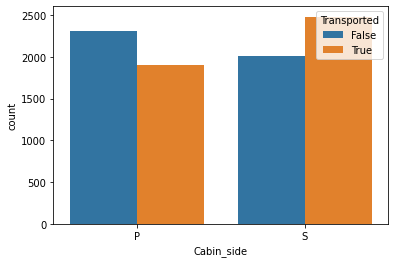

In [37]:
sns.countplot(data=df_train,x="Cabin_side",hue="Transported")

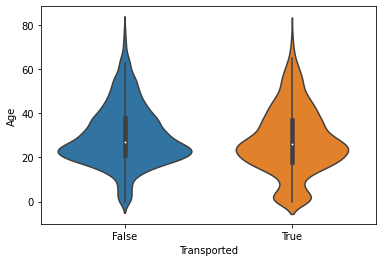

In [41]:
sns.violinplot(data=df_train,x="Transported",y="Age")

先結出兩小結論 :　

1.是否有進行冷凍睡眠,對於結果很有影響

2.對於艙位/側都有影響

(1)對於P/S側,兩側的生存率比例大約8:2 ，但是方向兩者相反

(2)對於不同艙位,B/F/E/C 這幾個艙位對於結果才有較大的差異

3.對於前往的星球其實沒有我想像的差這麼多(55 Cancri才稍微有點差)

4.對於乘客的home planet反而有點差距，但是這點不懂為什麼?

從圖來看earth或是europa對於結果有相當的差距

5.對於結果來說,兩者的年齡結構幾乎相同


In [44]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin_deck', 'Cabin_side'],
      dtype='object')

分析先到這邊為止

現在我想用的feature是HomePlanet,CryoSleep,Destination,Cabin_deck,Cabin_side

接下來要做data preprocessing(抓出所需資料以及one hot encoding)

In [45]:
categorical_feature=["HomePlanet","CryoSleep","Destination","Cabin_deck","Cabin_side"]

In [50]:
#Cabin deck有太多選項，我希望把沒甚麼影響的統整成一個Others,減少記憶體需求和避免發散

def CabinDeck_Trans(x):

  for i in range(len(x)):
    if x[i] in ["A","G","D","T"]:
      x[i]="Others"

  return x
df_train["Cabin_deck"]=CabinDeck_Trans(df_train["Cabin_deck"])
df_train["Cabin_deck"].unique()

array(['B', 'F', 'Others', 'E', 'C'], dtype=object)

In [55]:
x=pd.get_dummies(df_train,columns=categorical_feature)
y=x["Transported"]
x=x[x.columns[11:]] #擷取我想要的部分
x

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_E,Cabin_deck_F,Cabin_deck_Others,Cabin_side_P,Cabin_side_S
0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0
8689,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
8690,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
8691,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [56]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestClassifier

cls=RandomForestClassifier()
cls.fit(X_train,y_train)
pre_y=cls.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre_y))

0.7366302472685451


作為第一版的結果還可以接受,現在來做一下上船的資料

In [65]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [73]:
#缺失值補正
cols=df_test.isna().sum().index
cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [74]:
for i in cols:
    print(i)
    df_test[i].fillna(df_test[i].mode()[0],inplace=True)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Name


In [ ]:
deck,side=Cabin(df_test["Cabin"])
df_test["Cabin_deck"]=deck
df_test["Cabin_side"]=side
df_test["Cabin_deck"]=CabinDeck_Trans(df_train["Cabin_deck"])
df_test

In [81]:
result_x=pd.get_dummies(df_test,columns=categorical_feature)
result_x.columns
result_x=result_x[result_x.columns[10:]] #擷取我想要的部分
result_x

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_E,Cabin_deck_F,Cabin_deck_Others,Cabin_side_P,Cabin_side_S
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4273,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4274,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0
4275,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0


In [85]:
result_y=cls.predict(result_x)

In [86]:
result_y

array([ True, False,  True, ...,  True, False,  True])

In [95]:
result=pd.DataFrame(df_test["PassengerId"])
result["Transported"]=result_y

In [96]:
result.to_csv("result.csv",index=False)